
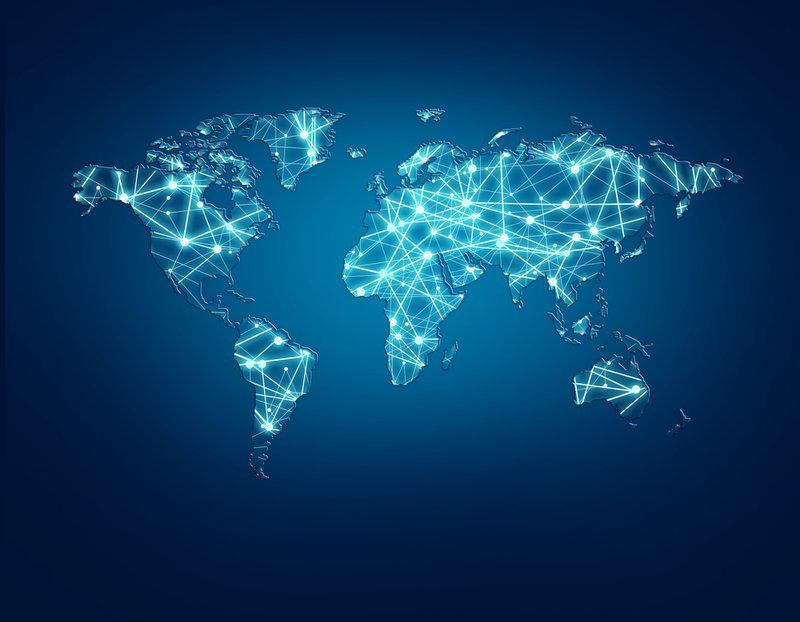


# Mental Health Acquisition 

**Author:** Carlos McCrum
***

## Overview

The goal is to find contributing factors to mental health worldwide and make predictions on these features to see where the World Health Organization can divert reasorces to assist in the mental health of people worldwide. This project will primarily be focusing on North and South America as there are many contries with the contributing factors varying in complexity accross different cultures so utilizing a more focused approch will produce more accurate results to the countries in question. The data comes from multipule sorces.  Methods include combining datasets, preprocessing, testing significant features and predictive modeling. Results show some the significant features that affect suicide rates are multilateral debt, access to clean water and electricity, education and freedom to make life choices. Recommendations would vary from country to country but ovarall recommendation is Universal Mental Health care, better adequacy of social safety net programs to those experiencing hardship. 


## Business Problem

Finding the contributing factors to suicide rates by country using, happiness scores, world development indicators and suicide rates from three different datasets. There is a vast amount of data contained in these datasets so the challange is going to be narrowing down which features to work with. 



***

## Data Understanding

Multipule sorces of data, the first being from the World Bank containing over a thousand indicators of economic development worldwide. The second comes from the Gallup World Poll containing the World Happiness Report and is a survey of the state of global happiness. The last is a dataset contains the suicide rates by country referecned from United Nations Development Program, World Health Organization, and the World Bank. The two target variables are 'Life Ladder' (happiness score) from the World Happiness Report and 'suicides/100k pop' from the Suicide Rates dataset. The world development dataset is only being used as a reference to find contributing features to either suicide rates or happiness scores becuase it has over a thousand indicators by year. 

***

* Import packages

In [115]:
!/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install nbconvert

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from statistics import mean
import numpy as np
from datetime import datetime
from datetime import timedelta
from time import time
from pandas.plotting import register_matplotlib_converters
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, KFold
from statsmodels.formula.api import ols
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, plot, iplot
import sqlite3
import Code.Preparation as prep
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, accuracy_score
from sklearn.feature_selection import f_regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor
register_matplotlib_converters()
import warnings
warnings.filterwarnings('ignore')

Load datasets

In [2]:
RateDf = pd.read_csv(prep.path('sucide.csv'))
RateDf = RateDf.rename(columns={'country': 'Country'}) 

HappyDf = pd.read_csv('Data/CleanedHappy.csv')

WorldDf = pd.read_csv('Data/WorldDf.csv')

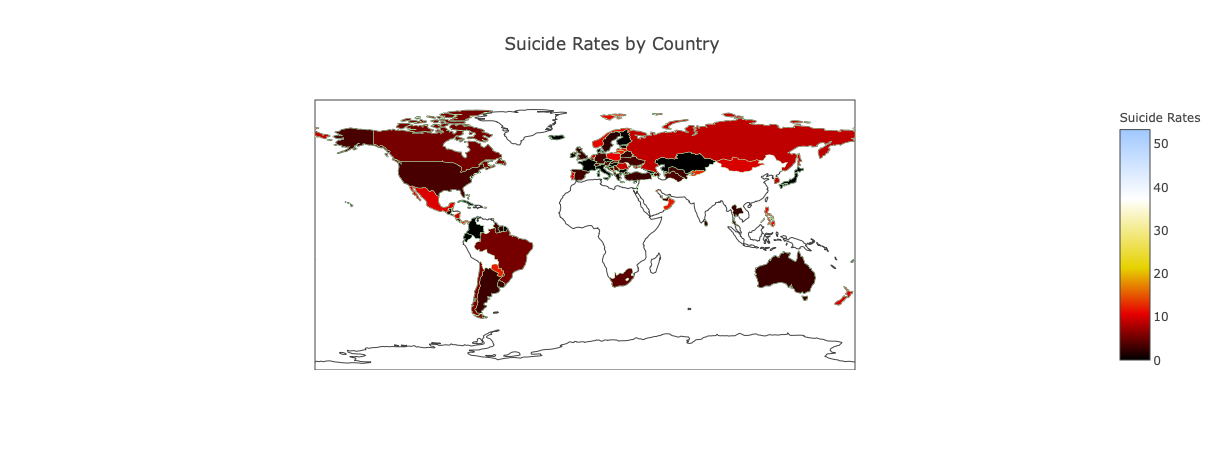

In [3]:
prep.plot_map(RateDf, 'suicides/100k pop', 'Suicide Rates by Country', 'Suicide Rates')

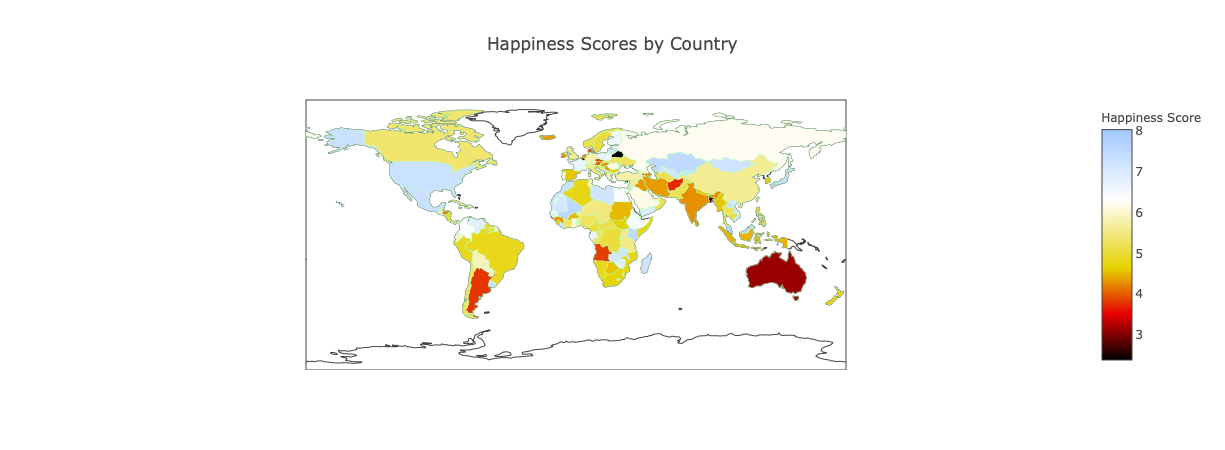

In [4]:
prep.plot_map(HappyDf, 'Life Ladder', 'Happiness Scores by Country', 'Happiness Score')

### Worldwide EDA

We can see that happiness rates hit a low around 2006 worldwide and has since been trending upwards untill the year 2020 where we see a sharp decline.

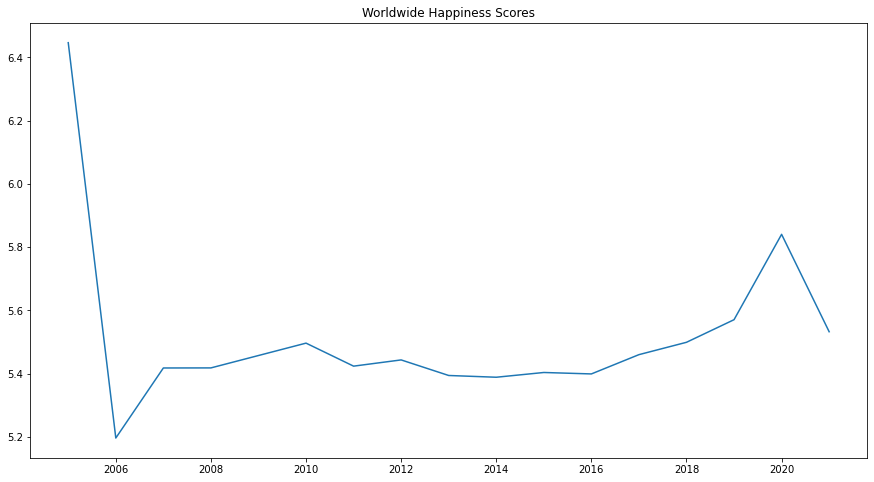

In [5]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(HappyDf.groupby('year').mean()['Life Ladder'])
plt.title('Worldwide Happiness Scores');

For suicide rates we have a longer timeframe from 1985 to 2016. We see that since the peak in the mid 1990s we have been trending downwards until around 2015 where we see a exponential sharp increase into missing data.

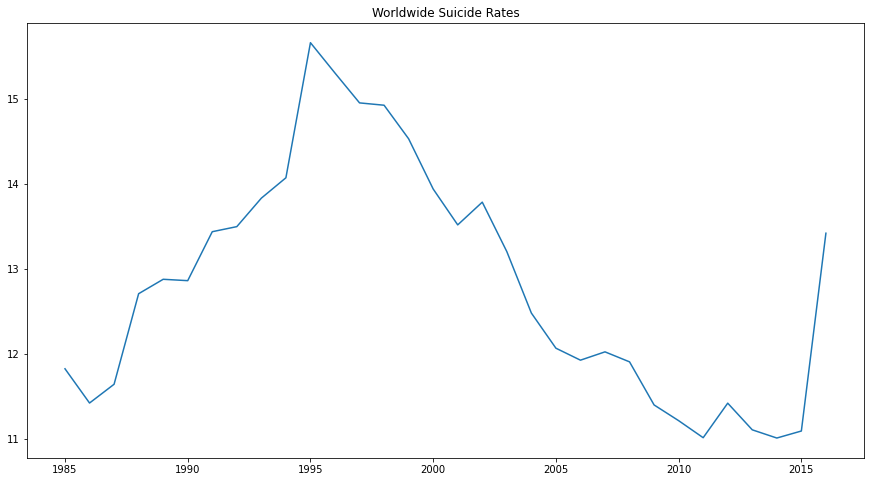

In [6]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(RateDf.groupby('year').mean()['suicides/100k pop'])
plt.title('Worldwide Suicide Rates');

### North and South America

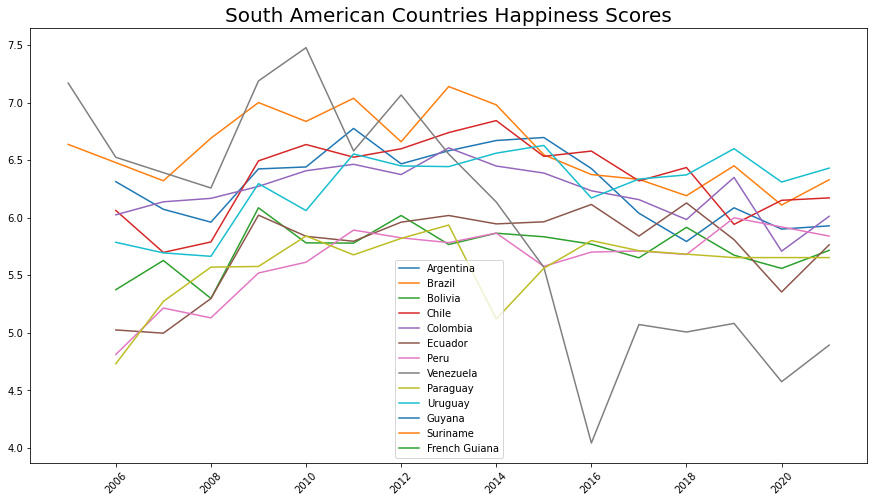

In [7]:
prep.plot_happy_S(HappyDf)
plt.title('South American Countries Happiness Scores', fontsize=20);

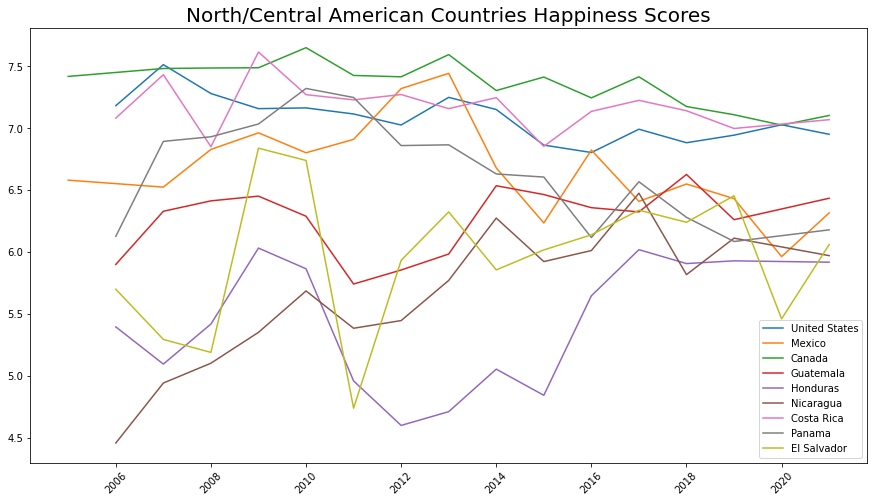

In [8]:
prep.plot_happy_N(HappyDf)
plt.title("North/Central American Countries Happiness Scores", fontsize=20);

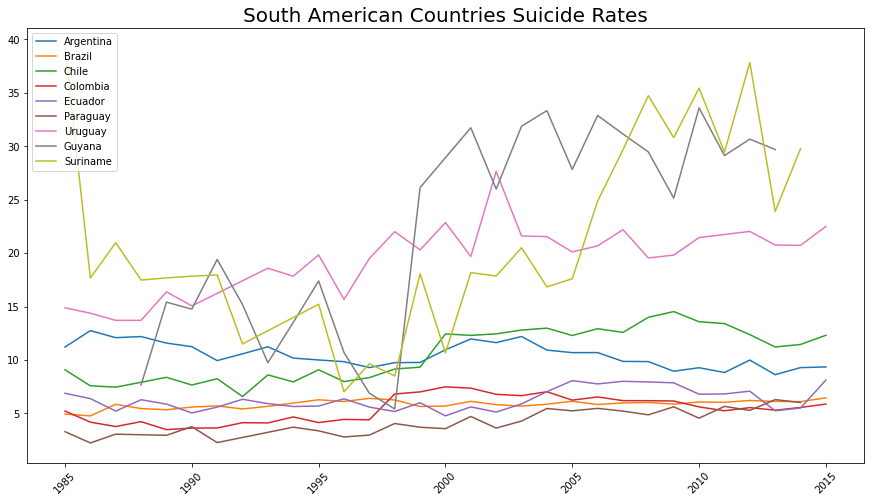

In [9]:
prep.plot_rate_S(RateDf)
plt.title('South American Countries Suicide Rates', fontsize=20);

* North/Central American Countries

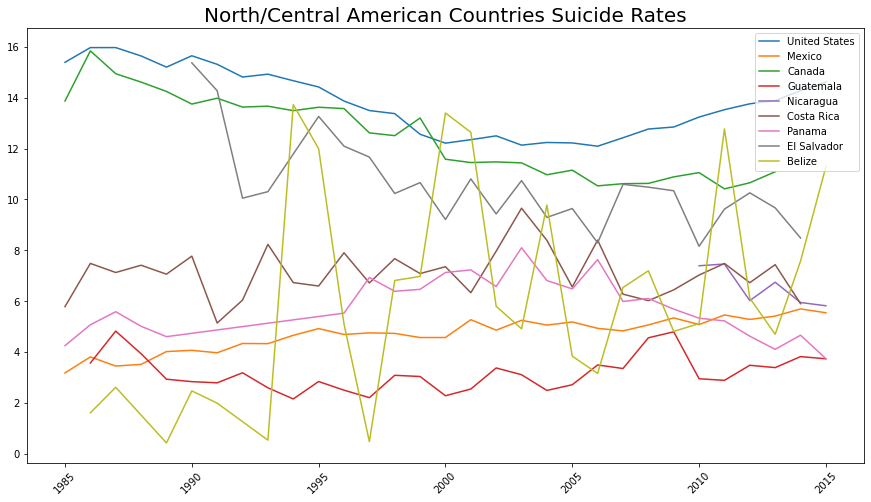

In [10]:
prep.plot_rate_N(RateDf)
plt.title("North/Central American Countries Suicide Rates", fontsize=20);

### EDA by Country

#### United States

Life Expectancy at Birth Average: 68.425
Happiness Score Average (0-10): 7.0815
Suicide Rate Average Per 100K: 13.819811827956988
Log GDP Per Capita Average: 10.524795596512899
Log GNI Per Capita Average: 10.49148778710336
Inflation Annual % Average: 2.6425262238698126
Foreign Investment % of GDP: 1.4811402483937215
-------------------------------------------
Perceptions of corruption: 0.6889375
Freedom to make life choices: 0.8429375
Generosity: 0.1825
Social Support: 0.9229375000000001
Rural Pop Growth % Average: -0.11044055030066484
Urban Pop Growth % Average: 1.2724578821291566
Social Safety Net Programs Adequacy Average: nan
Access to Electricity): 100.0
Access to Basic Water Services: 99.1743177137401


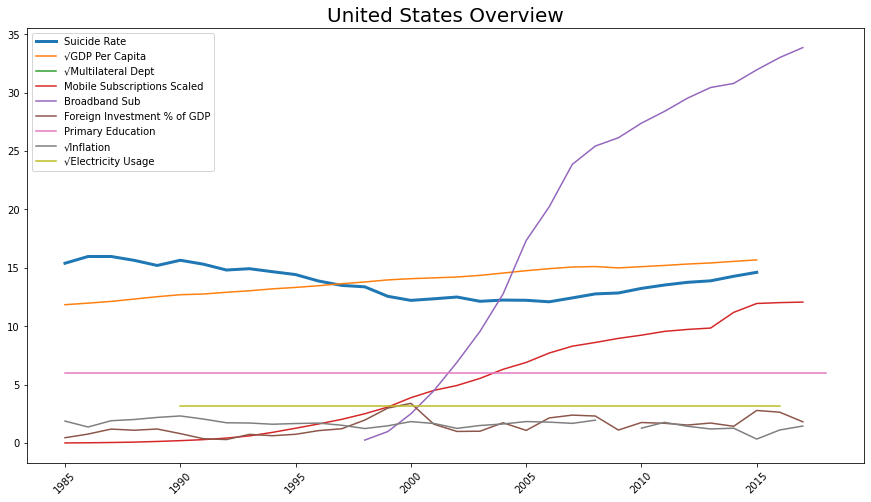

In [11]:
USA = prep.get_country_overview('United States', RateDf, HappyDf, WorldDf)

#### Canada

Life Expectancy at Birth Average: 72.76375
Happiness Score Average (0-10): 7.359249999999999
Suicide Rate Average Per 100K: 12.46758620689655
Log GDP Per Capita Average: 10.261933866606379
Log GNI Per Capita Average: 10.232987949546185
Inflation Annual % Average: 2.359580729668854
Foreign Investment % of GDP: 2.501204294126504
-------------------------------------------
Perceptions of corruption: 0.4176875
Freedom to make life choices: 0.927125
Generosity: 0.20975000000000002
Social Support: 0.9359062499999999
Rural Pop Growth % Average: 0.3405412603152634
Urban Pop Growth % Average: 1.2784641425177712
Social Safety Net Programs Adequacy Average: nan
Access to Electricity): 100.0
Access to Basic Water Services: 99.55625


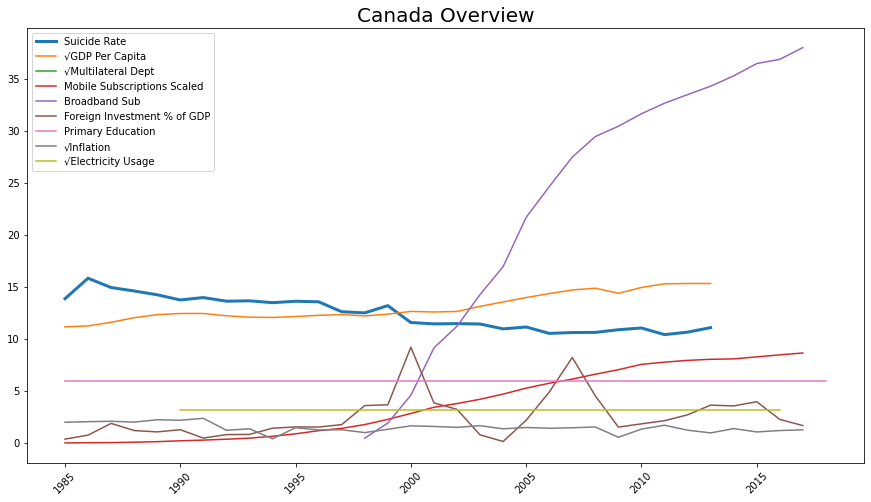

In [12]:
Canada = prep.get_country_overview('Canada', RateDf, HappyDf, WorldDf)

#### Russia

In [13]:
#Russia = prep.get_country_overview('Russia', RateDf, HappyDf, WorldDf)

#### China

In [14]:
#China = prep.get_country_overview('China', RateDf, HappyDf, WorldDf)

#### Austrailia

In [15]:
#Austrailia = prep.get_country_overview('Austrailia', RateDf, HappyDf, WorldDf)

#### Countries of Interest
We see that Guyana and Suriname have the highest suicide rates, while Paraguay has the lowest in South America so lets take a more in depth view of these following contries. 

#### Guyana

Life Expectancy at Birth Average: 57.26
Happiness Score Average (0-10): 5.9929999999999986
Suicide Rate Average Per 100K: 22.186400000000003
Log GDP Per Capita Average: 7.1856259704800065
Log GNI Per Capita Average: 7.027378756884167
Inflation Annual % Average: 4.878480428788435
Foreign Investment % of GDP: 7.457842926784485
-------------------------------------------
Perceptions of corruption: 0.836
Freedom to make life choices: 0.6940000000000001
Generosity: 0.11
Social Support: 0.8490000000000001
Rural Pop Growth % Average: 0.16195808122676314
Urban Pop Growth % Average: -0.37377581452871006
Social Safety Net Programs Adequacy Average: nan
Access to Electricity): 76.22949086912439
Access to Basic Water Services: 91.5331250892575


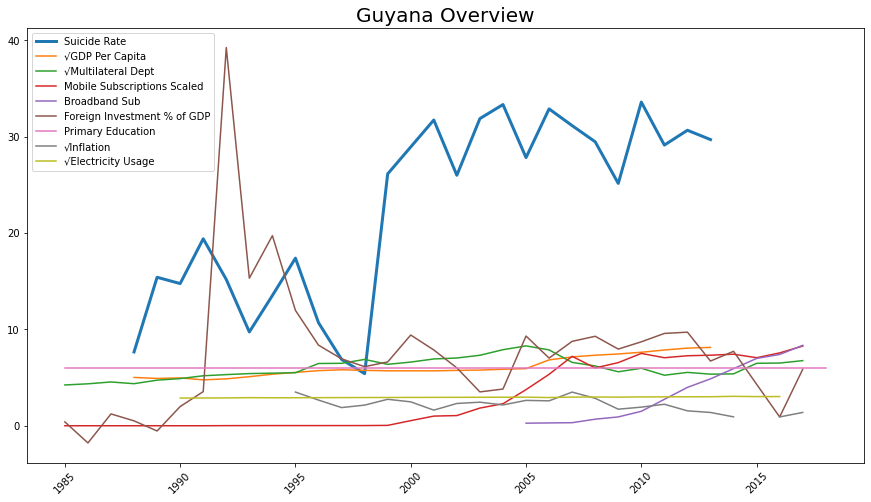

In [73]:
Guyana = prep.get_country_overview('Guyana', RateDf, HappyDf, WorldDf)

#### Suriname

Life Expectancy at Birth Average: 62.24
Happiness Score Average (0-10): 6.269
Suicide Rate Average Per 100K: 21.31642857142857
Log GDP Per Capita Average: 8.125666613257696
Log GNI Per Capita Average: 7.997339894739712
Inflation Annual % Average: 41.275728406537084
Foreign Investment % of GDP: -5.335820786842539
-------------------------------------------
Perceptions of corruption: 0.7509999999999999
Freedom to make life choices: 0.885
Generosity: -0.077
Social Support: 0.797
Rural Pop Growth % Average: 1.2244483253972562
Urban Pop Growth % Average: 1.3295356135631797
Social Safety Net Programs Adequacy Average: nan
Access to Electricity): 94.8504330798806
Access to Basic Water Services: 92.33743150364587


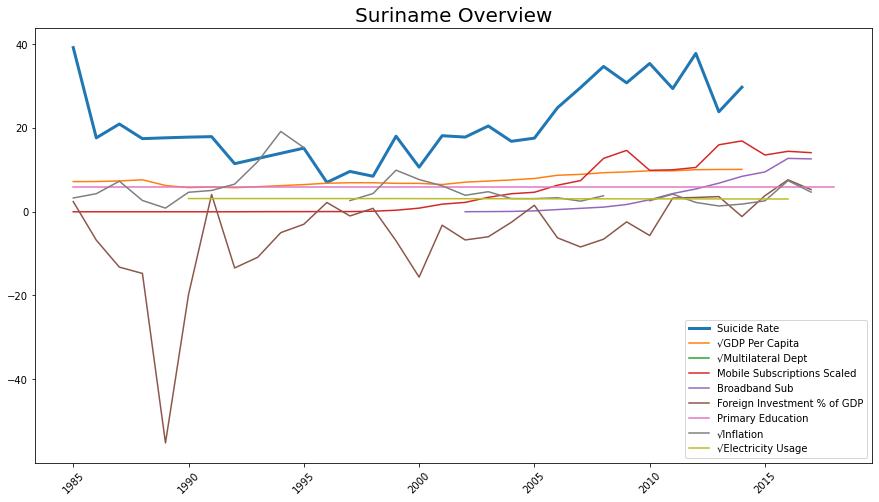

In [17]:
Suriname = prep.get_country_overview('Suriname', RateDf, HappyDf, WorldDf)

#### Paraguay

Life Expectancy at Birth Average: 64.8
Happiness Score Average (0-10): 5.565785714285716
Suicide Rate Average Per 100K: 4.217191358024691
Log GDP Per Capita Average: 7.657424096083206
Log GNI Per Capita Average: 7.848584448141161
Inflation Annual % Average: 12.40665451409895
Foreign Investment % of GDP: 1.1047760840886482
-------------------------------------------
Perceptions of corruption: 0.8347857142857142
Freedom to make life choices: 0.7762857142857144
Generosity: 0.05521428571428572
Social Support: 0.9053571428571427
Rural Pop Growth % Average: 0.853197393783093
Urban Pop Growth % Average: 2.947391671292183
Social Safety Net Programs Adequacy Average: 13.799886355329575
Access to Electricity): 91.29136785675276
Access to Basic Water Services: 87.32253150702837


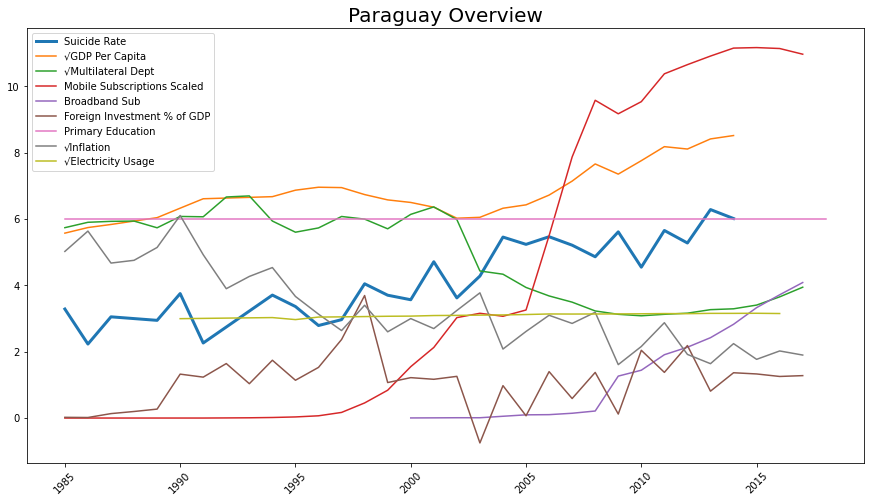

In [18]:
Paraguay = prep.get_country_overview('Paraguay', RateDf, HappyDf, WorldDf)

See what features correlate most with suicide rates

In [19]:
World_Overview = prep.get_world_overview(RateDf, HappyDf, WorldDf)

Life Expectancy at Birth Average: 62.855488107316795
Happiness Score Average (0-10): 5.43152168367347
Suicide Rate Average Per 100K: 11.51421875
Log GDP Per Capita Average: 9.620263626763
Log GNI Per Capita Average: 8.487279977306615
Inflation Annual % Average: 5.31226206771533
Foreign Investment % of GDP: 5.9855480262759935
-------------------------------------------
Perceptions of corruption: 0.7492286267144845
Freedom to make life choices: 0.7298852040816327
Generosity: 0.004366523171768704
Social Support: 0.8109151785714285
Rural Pop Growth % Average: 0.4184128587661824
Urban Pop Growth % Average: 2.109200376375242
Social Safety Net Programs Adequacy Average: 10.014306870986822
Access to Electricity: 79.79457617500604
Access to Basic Water Services: 85.27919395128757


In [20]:
Countries = pd.concat((USA, Canada, Guyana, Paraguay, Suriname)).interpolate().dropna()

In [21]:
#plt.subplots(figsize=(15,15))
#sns.heatmap(Countries.corr(), annot = True, cmap = 'coolwarm');

In [22]:
World_Overview = World_Overview.interpolate().dropna()

In [23]:
RateCat = RateDf.copy().set_index(['Country', 'year'])[['sex', 'age', 'generation']]
le = LabelEncoder()
RateCat['sex'] = le.fit_transform(RateCat['sex'])
RateCat['age'] = le.fit_transform(RateCat['age'])
RateCat['generation'] = le.fit_transform(RateCat['generation'])

In [24]:
World_comb = RateCat.merge(World_Overview, on=['Country'])

In [25]:
World_Comb = World_Overview.groupby(['Country']).mean()

In [26]:
World_Overview = World_Overview.groupby('Country').mean()

In [27]:
World_Overview

suicides/100k pop  gdp_per_capita ($)  Life Ladder  \
Country                                                              
Afghanistan              1.460000         2309.000000     3.767769   
Albania                  3.104191         4438.166287     5.265704   
Algeria                  1.460000         2309.000000     4.522846   
American Samoa           1.460000         2309.000000     3.638000   
Andorra                  1.460000         2309.000000     3.638000   
...                           ...                 ...          ...   
World                    1.460000         2309.000000     3.638000   
Yemen                    1.460000         2309.000000     3.969200   
Yemen, Rep.              1.460000         2309.000000     3.638000   
Zambia                   1.460000         2309.000000     4.524154   
Zimbabwe                 1.460000         2309.000000     4.031308   

                Perceptions of corruption  Freedom to make life choices  \
Country                                                                   
Afghanistan                      0.809308                      0.593000   
Albania                          0.820731                      0.542287   
Algeria                          0.714846                      0.649385   
American Samoa                   0.751000                      0.753000   
Andorra                          0.751000                      0.753000   
...                                   ...                           ...   
World                            0.751000                      0.753000   
Yemen                            0.826300                      0.626500   
Yemen, Rep.                      0.751000                      0.753000   
Zambia                           0.819462                      0.749923   
Zimbabwe                         0.842308                      0.579538   

                Generosity  Healthy life expectancy at birth  Social support  \
Country                                                                        
Afghanistan       0.057615                         52.861538        0.571923   
Albania          -0.137123                         66.221185        0.795982   
Algeria          -0.134615                         59.640000        0.773923   
American Samoa   -0.098000                         55.000000        0.754000   
Andorra          -0.098000                         55.000000        0.754000   
...                    ...                               ...             ...   
World            -0.098000                         55.000000        0.754000   
Yemen            -0.126200                         54.420000        0.721900   
Yemen, Rep.      -0.098000                         55.000000        0.754000   
Zambia           -0.014615                         51.269231        0.747154   
Zimbabwe         -0.092462                         49.223077        0.807231   

                Multilateral Dept  Urban Pop Growth  Rural Pop Growth  \
Country                                                                 
Afghanistan             40.119738          3.866858          2.701938   
Albania                 30.178976          1.508330         -2.839123   
Algeria                  4.315900          2.793932         -0.376898   
American Samoa          33.394500         -0.575520          0.157847   
Andorra                 33.394500         -0.151227          1.978143   
...                           ...               ...               ...   
World                   33.394500          2.145020          0.218519   
Yemen                   25.448800          3.526682          0.942303   
Yemen, Rep.             45.485977          4.480379          1.784011   
Zambia                  21.682892          4.166814          2.059748   
Zimbabwe                23.046038          1.504837          2.217774   

                Mobile Subscriptions  Broadband Subscriptions  \
Country                                                         
Afghanis

# Modeling

#### Suicide Rates

Finding most significant features using f_regression

In [28]:
y = World_Overview["suicides/100k pop"]

X = World_Overview.drop(["suicides/100k pop"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=789)

feature_names = X_train.columns

X_train = (X_train - np.mean(X_train)) / np.std(X_train)

print("Feature P_values:")
for i, data_class in enumerate(feature_names):
    print("{} ({})".format(data_class, f_regression(X, y)[1][i]))

Feature P_values:
gdp_per_capita ($) (5.544001578440267e-13)
Life Ladder (9.024212623860002e-23)
Perceptions of corruption (0.9666471774648426)
Freedom to make life choices (0.1374342361360452)
Generosity (0.03561852078483333)
Healthy life expectancy at birth (2.0999746450019605e-24)
Social support (2.0153660721480435e-25)
Multilateral Dept (5.372449540244247e-06)
Urban Pop Growth (1.5828117669927158e-12)
Rural Pop Growth (1.2845276432320007e-07)
Mobile Subscriptions (1.691097499339893e-08)
Broadband Subscriptions (6.468764659383928e-07)
Foreign Investment (0.8803311783320253)
GNI Per Capita (1.630415008272107e-05)
Primary Education (4.487261460895899e-06)
Inflation (0.3014258554349313)
Social Safety Net Programs (0.014731347878068828)
Access to Electricity (1.805986827881505e-07)
Access to Improved Water (7.22332325324177e-09)


In [29]:
gb = GradientBoostingRegressor()

y = World_Overview["suicides/100k pop"]

X = World_Overview.drop('suicides/100k pop', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=789)

start = time()
model = gb.fit(X_train, y_train)
end = time()
print("Fitting Time:", end - start)


Fitting Time: 0.1170649528503418


In [30]:
print('Training Accuracy: ', model.score(X_train, y_train))
print('Test Accuracy: ', model.score(X_test, y_test))

Training Accuracy:  0.9887529513648243
Test Accuracy:  0.3980480792606449


In [31]:
rf = RandomForestRegressor(random_state=789)
y = World_Overview["suicides/100k pop"]

X = World_Overview.drop('suicides/100k pop', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=789)

start = time()
rmodel = rf.fit(X_train, y_train)
end = time()
print("Fitting Time:", end - start)

Fitting Time: 0.23767590522766113


In [32]:
print('Training Accuracy: ', rmodel.score(X_train, y_train))
print('Test Accuracy: ', rmodel.score(X_test, y_test))

Training Accuracy:  0.9193237957979947
Test Accuracy:  0.5421684821779668


In [33]:
feature_names = X_train.columns
importance = model.feature_importances_

print("Feature Importances:")
for i, data_class in enumerate(feature_names):
    print("{} ({})".format(data_class, importance[i]))

Feature Importances:
gdp_per_capita ($) (0.2350870549858137)
Life Ladder (0.010079038117149594)
Perceptions of corruption (0.014394408677491559)
Freedom to make life choices (0.020568554475918)
Generosity (0.008789833246806468)
Healthy life expectancy at birth (0.02761459941192641)
Social support (0.3486011153305724)
Multilateral Dept (0.0825069359163986)
Urban Pop Growth (0.11255112480669133)
Rural Pop Growth (0.02513554016865997)
Mobile Subscriptions (0.0058626874007470875)
Broadband Subscriptions (0.03767199363976295)
Foreign Investment (0.010867111227696352)
GNI Per Capita (0.002365796895362124)
Primary Education (0.0022393583742008945)
Inflation (0.012069335109580507)
Social Safety Net Programs (0.008119985247284987)
Access to Electricity (0.0009605636657970604)
Access to Improved Water (0.03451496330214016)


In [34]:
X_int = sm.add_constant(X_train)
mod1 = sm.OLS(y_train, X_int).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      suicides/100k pop   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     11.98
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           1.02e-23
Time:                        16:35:14   Log-Likelihood:                -637.40
No. Observations:                 215   AIC:                             1315.
Df Residuals:                     195   BIC:                             1382.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                              -25.2154      9.058     -2.784      0.006     -43.081      -7.350
gdp_per_capita ($)                   0.0001   4.41e-05      2.667      0.008    3.06e-05       0.000
Life Ladder                          0.3487      0.784      0.445      0.657      -1.198       1.895
Perceptions of corruption           11.1632      3.778      2.955      0.004       3.712      18.614
Freedom to make life choices        10.4580      5.432      1.925      0.056      -0.255      21.171
Generosity                          -1.1761      3.833     -0.307      0.759      -8.736       6.384
Healthy life expectancy at birth     0.2049      0.139      1.472      0.143      -0.070       0.480
Social support                      20.4613      8.242      2.483      0.014       4.207      36.716
Multilateral Dept                    0.0005      0.026      0.018      0.986      -0.051       0.052
Urban Pop Growth                    -1.3287      0.294     -4.525      0.000      -1.908      -0.750
Rural Pop Growth                    -0.1970      0.294     -0.671      0.503      -0.776       0.382
Mobile Subscriptions                 0.0324      0.014      2.239      0.026       0.004       0.061
Broadband Subscriptions             -0.1274      0.064     -1.996      0.047      -0.253      -0.001
Foreign Investment                  -0.0026      0.012     -0.213      0.832      -0.026       0.021
GNI Per Capita                    5.536e-06   4.02e-05      0.138      0.891   -7.38e-05    8.49e-05
Primary Education                   -1.6861      0.500     -3.375      0.001      -2.672      -0.701
Inflation                            0.0403      0.059      0.687      0.493      -0.075       0.156
Social Safety Net Programs          -0.0107      0.064     -0.169      0.866      -0.136       0.115
Access to Electricity               -0.0646      0.030     -2.190      0.030      -0.123      -0.006
Access to Improved Water            -0.0127      0.044     -0.289      0.773      -0.100       0.074
==============================================================================
Omnibus:                       91.349   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              377.994
Skew:                           1.685   Prob(JB):                     8.31e-83
Kurtosis:                       8.554   Cond. No.                     8.36e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Happiness Scores

In [35]:
y = World_Overview["Life Ladder"]

X = World_Overview.drop(["Life Ladder"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=789)

feature_names = X_train.columns


print("Feature P_values:")
for i, data_class in enumerate(feature_names):
    print("{} ({})".format(data_class, f_regression(X, y)[1][i]))

Feature P_values:
suicides/100k pop (9.024212623857783e-23)
gdp_per_capita ($) (7.20289543185024e-42)
Perceptions of corruption (2.575555805573293e-08)
Freedom to make life choices (6.702475104833622e-07)
Generosity (1.6424742221844308e-20)
Healthy life expectancy at birth (5.893530324951128e-88)
Social support (3.688220349274751e-65)
Multilateral Dept (1.5861393750502557e-11)
Urban Pop Growth (0.007106929341915538)
Rural Pop Growth (0.003048221854454505)
Mobile Subscriptions (3.420255772180148e-13)
Broadband Subscriptions (6.599240320116406e-09)
Foreign Investment (0.8598770897460141)
GNI Per Capita (4.421427887473858e-12)
Primary Education (0.22352855684994102)
Inflation (0.017074890634115037)
Social Safety Net Programs (0.0003189138402272748)
Access to Electricity (6.205893111861246e-13)
Access to Improved Water (6.44687699335046e-12)


In [36]:
rf = RandomForestRegressor(random_state=789)

start = time()
rmodel = rf.fit(X_train, y_train)
end = time()
print("Fitting Time:", end - start)

Fitting Time: 0.2785179615020752


In [37]:
print('Training Accuracy: ', rmodel.score(X_train, y_train))
print('Test Accuracy: ', rmodel.score(X_test, y_test))

Training Accuracy:  0.9885767765627066
Test Accuracy:  0.8917772309427117


In [38]:
feature_names = X_train.columns
importance = model.feature_importances_

print("Feature Importances:")
for i, data_class in enumerate(feature_names):
    print("{} ({})".format(data_class, importance[i]))

Feature Importances:
suicides/100k pop (0.2350870549858137)
gdp_per_capita ($) (0.010079038117149594)
Perceptions of corruption (0.014394408677491559)
Freedom to make life choices (0.020568554475918)
Generosity (0.008789833246806468)
Healthy life expectancy at birth (0.02761459941192641)
Social support (0.3486011153305724)
Multilateral Dept (0.0825069359163986)
Urban Pop Growth (0.11255112480669133)
Rural Pop Growth (0.02513554016865997)
Mobile Subscriptions (0.0058626874007470875)
Broadband Subscriptions (0.03767199363976295)
Foreign Investment (0.010867111227696352)
GNI Per Capita (0.002365796895362124)
Primary Education (0.0022393583742008945)
Inflation (0.012069335109580507)
Social Safety Net Programs (0.008119985247284987)
Access to Electricity (0.0009605636657970604)
Access to Improved Water (0.03451496330214016)


In [39]:
X_int = sm.add_constant(X_train)
mod1 = sm.OLS(y_train, X_int).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Life Ladder   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     73.65
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           3.57e-78
Time:                        16:35:15   Log-Likelihood:                -122.71
No. Observations:                 215   AIC:                             285.4
Df Residuals:                     195   BIC:                             352.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -3.7132      0.800     -4.641      0.000      -5.291      -2.135
suicides/100k pop                    0.0029      0.007      0.445      0.657      -0.010       0.016
gdp_per_capita ($)                1.094e-05   4.02e-06      2.721      0.007    3.01e-06    1.89e-05
Perceptions of corruption           -0.3157      0.352     -0.898      0.371      -1.009       0.378
Freedom to make life choices        -0.0939      0.500     -0.188      0.851      -1.081       0.893
Generosity                           1.6332      0.330      4.951      0.000       0.983       2.284
Healthy life expectancy at birth     0.1033      0.010      9.908      0.000       0.083       0.124
Social support                       3.4683      0.723      4.800      0.000       2.043       4.893
Multilateral Dept                   -0.0014      0.002     -0.584      0.560      -0.006       0.003
Urban Pop Growth                    -0.0127      0.028     -0.449      0.654      -0.068       0.043
Rural Pop Growth                     0.0356      0.027      1.333      0.184      -0.017       0.088
Mobile Subscriptions                 0.0029      0.001      2.203      0.029       0.000       0.006
Broadband Subscriptions             -0.0038      0.006     -0.653      0.514      -0.015       0.008
Foreign Investment                  -0.0013      0.001     -1.224      0.223      -0.003       0.001
GNI Per Capita                   -4.086e-06   3.66e-06     -1.116      0.266   -1.13e-05    3.13e-06
Primary Education                    0.0121      0.047      0.257      0.797      -0.080       0.105
Inflation                           -0.0010      0.005     -0.187      0.852      -0.012       0.010
Social Safety Net Programs          -0.0004      0.006     -0.063      0.950      -0.012       0.011
Access to Electricity               -0.0007      0.003     -0.253      0.800      -0.006       0.005
Access to Improved Water            -0.0044      0.004     -1.103      0.271      -0.012       0.003
==============================================================================
Omnibus:                       31.915   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.915
Skew:                           0.897   Prob(JB):                     1.77e-10
Kurtosis:                       4.339   Cond. No.                     8.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Time Series

In [100]:
Guyana.reset_index(inplace=True)

In [101]:
Guyana.year = Guyana.year.astype(str)
Guyana.year = pd.to_datetime(Guyana.year)
Guyana.set_index('year', inplace=True)

In [102]:
ts_guya = Guyana['Multilateral Dept'].sort_index()

In [103]:
ts_guya

year
1985-01-01    17.9088
1986-01-01    18.9459
1987-01-01    20.6370
1988-01-01    19.0441
1989-01-01    22.3638
1990-01-01    23.9560
1991-01-01    26.8951
1992-01-01    28.1660
1993-01-01    29.3052
1994-01-01    29.7757
1995-01-01    30.2644
1996-01-01    41.7355
1997-01-01    41.9801
1998-01-01    47.3819
1999-01-01    40.6130
2000-01-01    43.6642
2001-01-01    48.0326
2002-01-01    49.4291
2003-01-01    53.5001
2004-01-01    62.2936
2005-01-01    68.6879
2006-01-01    61.9339
2007-01-01    43.2231
2008-01-01    38.4760
2009-01-01    31.3664
2010-01-01    35.6200
2011-01-01    27.4865
2012-01-01    30.6687
2013-01-01    28.6531
2014-01-01    28.9705
2015-01-01    41.9964
2016-01-01    42.3291
2017-01-01    45.6498
2018-01-01        NaN
Name: Multilateral Dept, dtype: float64

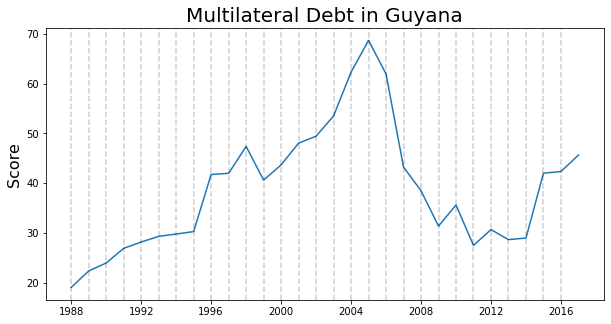

In [104]:
guya_debt = ts_guya.asfreq(pd.infer_freq(ts_guya.index))

start_date = datetime(1988,1,1)
end_date = datetime(2017,1,1)
lim_guya_debt = guya_debt[start_date:end_date]

plt.figure(figsize=(10,5))
plt.plot(lim_guya_debt)
plt.title('Multilateral Debt in Guyana', fontsize=20)
plt.ylabel('Score', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2);

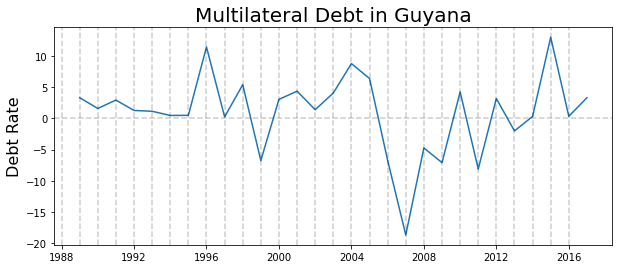

In [105]:
first_diff = lim_guya_debt.diff()[1:]

plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('Multilateral Debt in Guyana', fontsize=20)
plt.ylabel('Debt Rate', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)

In [106]:
train_end = datetime(2012,1,1)
test_end = datetime(2017,1,31)

train_data = lim_guya_debt[:train_end]
test_data = lim_guya_debt[train_end + timedelta(days=1):test_end]

order = (0,1,0)
seasonal_order = (0, 0, 1, 5)

model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
start = time()
model_fit = model.fit()
end = time()
print("Fitting Time:", end - start)
print(model_fit.summary())

Fitting Time: 0.04198503494262695
                                      SARIMAX Results                                      
Dep. Variable:                   Multilateral Dept   No. Observations:                   25
Model:             SARIMAX(0, 1, 0)x(0, 0, [1], 5)   Log Likelihood                 -78.301
Date:                             Tue, 30 Nov 2021   AIC                            160.602
Time:                                     16:49:57   BIC                            162.958
Sample:                                 01-01-1988   HQIC                           161.227
                                      - 01-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L5       -0.0514      0.287     -0.179      0.858      -0.614      

In [111]:
# print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))
# print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

In [112]:
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = lim_guya_debt[:train_end-timedelta(days=1)]
    model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()
    
    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred
rolling_residuals = test_data - rolling_predictions

Mean Absolute Percent Error: 0.0955
Root Mean Squared Error: 6.170961228129326


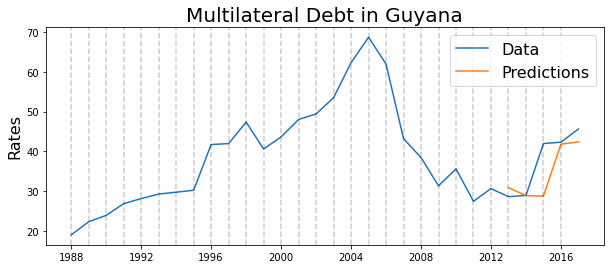

In [113]:
plt.figure(figsize=(10,4))
plt.plot(lim_guya_debt)
plt.plot(rolling_predictions)
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title('Multilateral Debt in Guyana', fontsize=20)
plt.ylabel('Rates', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
    
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test_data)),4))
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

In [114]:
print(model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                   Multilateral Dept   No. Observations:                   29
Model:             SARIMAX(0, 1, 0)x(0, 0, [1], 5)   Log Likelihood                 -91.550
Date:                             Tue, 30 Nov 2021   AIC                            187.101
Time:                                     16:50:43   BIC                            189.765
Sample:                                 01-01-1988   HQIC                           187.915
                                      - 01-01-2016                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L5        0.0160      0.257      0.062      0.950      -0.488       0.520
sigma2        40.5035      

## Evaluation
Our model performed fairly well with a accuracy score of 96%. From that we have use our significant features to predict our targets. 
